# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 12.02.2023

### Author: Semen Koveshnikov

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

In [36]:
#lib import
import networkx as nx
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [ ]:
#graph creation
G=nx.Graph()
G.add_nodes_from('ABCDE')
edge=zip('AAAA','BCDE')
G.add_edges_from(edge)

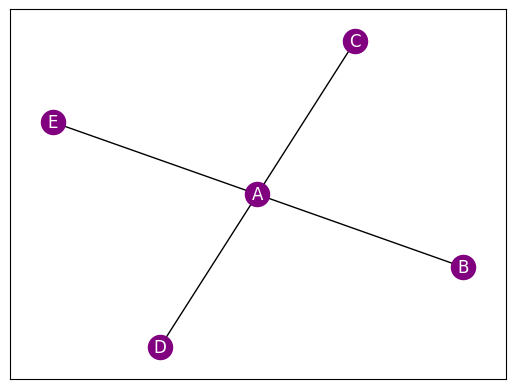

In [ ]:
#graph plot
nx.draw_networkx(G, node_color='purple',font_color='white')
plt.show()

Node $A$ only recieves data from other nodes $B-E$, as the topology type is many-to-one. Hence, the of awareness for the system can be descibed by the following reflection:

$Ω = T(1+Ba+Ca+Da+Ea)$



**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

In [16]:
airport=pd.read_csv("AirportData.csv",decimal=b".",sep=",",usecols=[0,1,2,3,5,6], 
parse_dates=[[0,1,3,2]],index_col=[0])
airport.index.names=['Time']
airport.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        745 non-null    float64
dtypes: float64(2)
memory usage: 17.5 KB


In [17]:
airport.head()
airport[]

,Air temperature (degC),Wind speed (m/s)
Time,,
2018-07-01 00:00:00,10.7,5.1
2018-07-01 01:00:00,10.3,6.7
2018-07-01 02:00:00,10.5,5.7
2018-07-01 03:00:00,10.7,6.7
2018-07-01 04:00:00,11.4,7.7


In [18]:
Lepola=pd.read_csv("LepolaData.csv",decimal=b".",sep=",",usecols=[0,1,2,3,5,6], 
parse_dates=[[0,1,3,2]],index_col=[0])
Lepola.index.names=['Time']
Lepola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        745 non-null    object 
dtypes: float64(1), object(1)
memory usage: 17.5+ KB


In [27]:
Lepola['Wind speed (m/s)']=Lepola['Wind speed (m/s)'].map(lambda x: np.NAN if x=='-' else x)
Lepola["Wind speed (m/s)"]=Lepola["Wind speed (m/s)"].fillna(method='ffill')
Lepola.isnull().any()
Lepola["Wind speed (m/s)"]=Lepola["Wind speed (m/s)"].astype('float')
Lepola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        745 non-null    float64
dtypes: float64(2)
memory usage: 17.5 KB


In [28]:
Lepola.head()

,Air temperature (degC),Wind speed (m/s)
Time,,
2018-07-01 00:00:00,10.7,3.7
2018-07-01 01:00:00,10.4,5.4
2018-07-01 02:00:00,10.4,4.4
2018-07-01 03:00:00,10.6,5.0
2018-07-01 04:00:00,11.3,4.4


In [33]:
airport['B msg']=airport["Air temperature (degC)"]>25
airport['C msg']=airport['Wind speed (m/s)']>5
Lepola['D msg']=Lepola["Air temperature (degC)"]>25
Lepola['E msg']=Lepola['Wind speed (m/s)']>5

[Text(0.5, 1.0, 'Node B message to aggregator A'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Message value')]

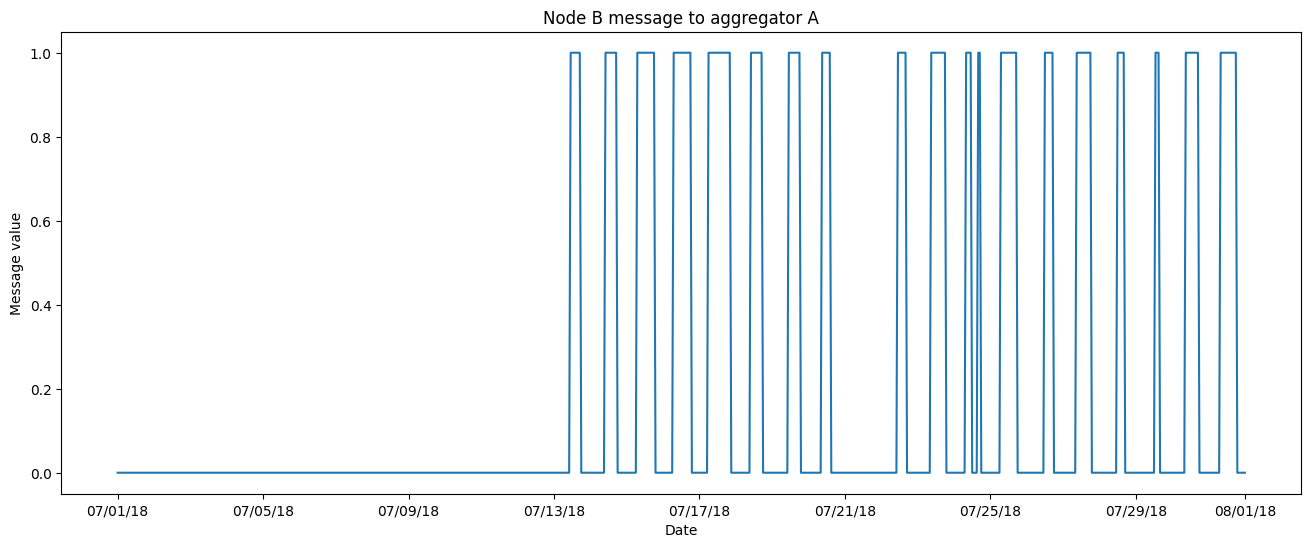

In [52]:
#msg from B to A
fig, ax = plt.subplots(figsize=(16,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.plot(airport.index,airport['B msg'])
ax.set(title="Node B message to aggregator A",xlabel='Date',ylabel='Message value')

[Text(0.5, 1.0, 'Node C message to aggregator A'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Message value')]

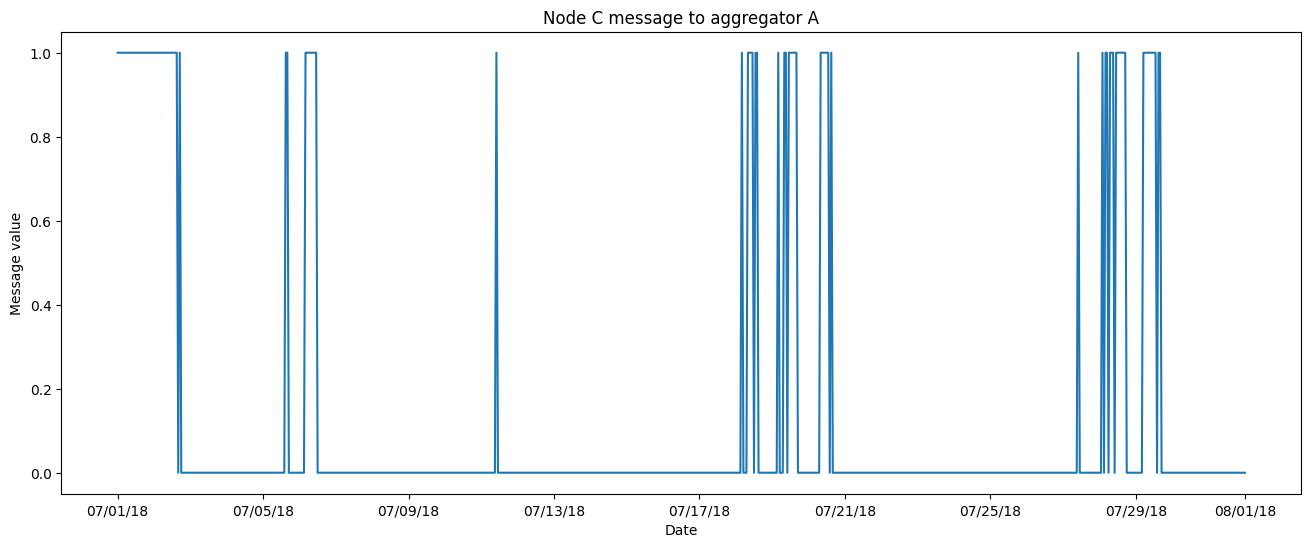

In [51]:
#msg from C to A
fig, ax = plt.subplots(figsize=(16,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.plot(airport.index,airport['C msg'])
ax.set(title="Node C message to aggregator A",xlabel="Date",ylabel='Message value')

[Text(0.5, 1.0, 'Node D message to aggregator A'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Message value')]

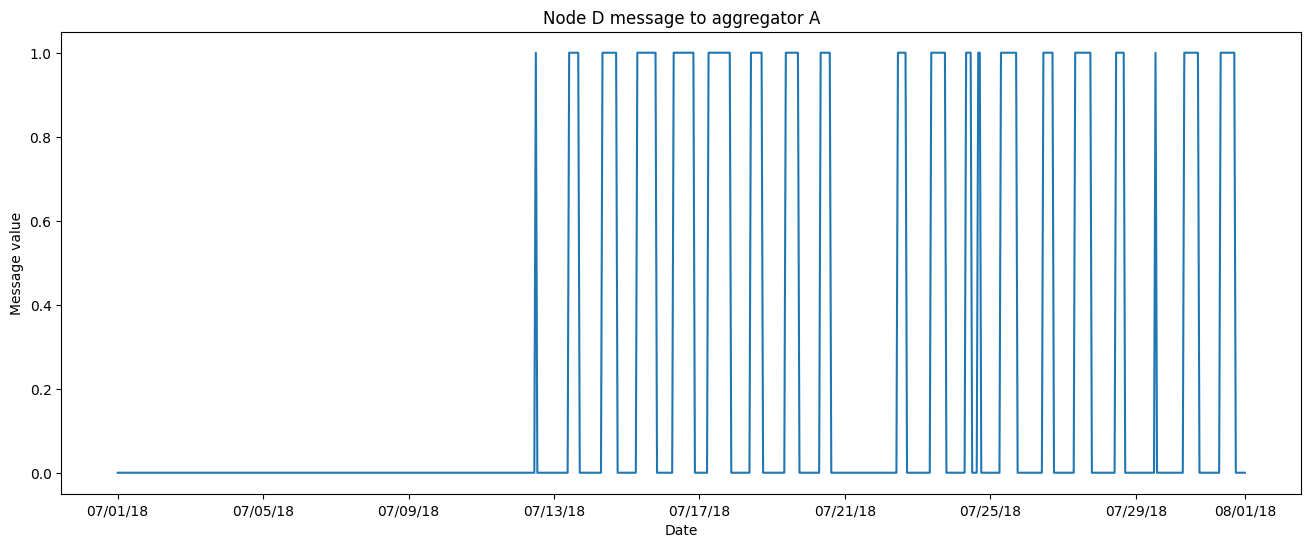

In [50]:
#msg from D to A
fig, ax = plt.subplots(figsize=(16,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.plot(Lepola.index,Lepola['D msg'])
ax.set(title="Node D message to aggregator A",xlabel="Date",ylabel='Message value')

[Text(0.5, 1.0, 'Node E message to aggregator A'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Message value')]

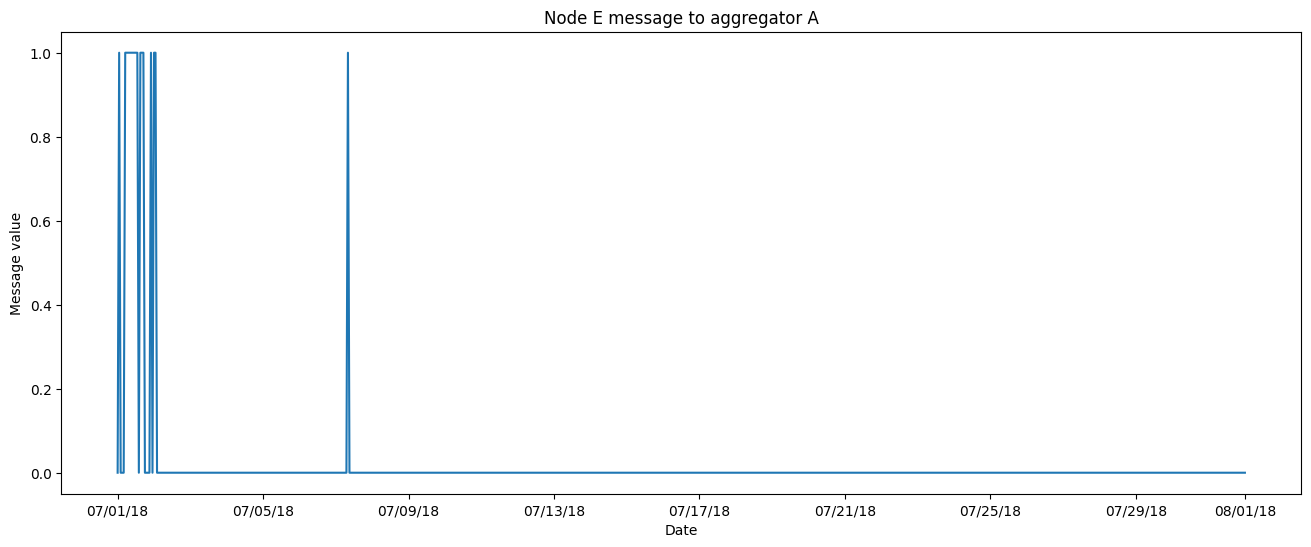

In [49]:
#msg from E to A
fig, ax = plt.subplots(figsize=(16,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.plot(Lepola.index,Lepola['E msg'])
ax.set(title="Node E message to aggregator A",xlabel='Date',ylabel='Message value')

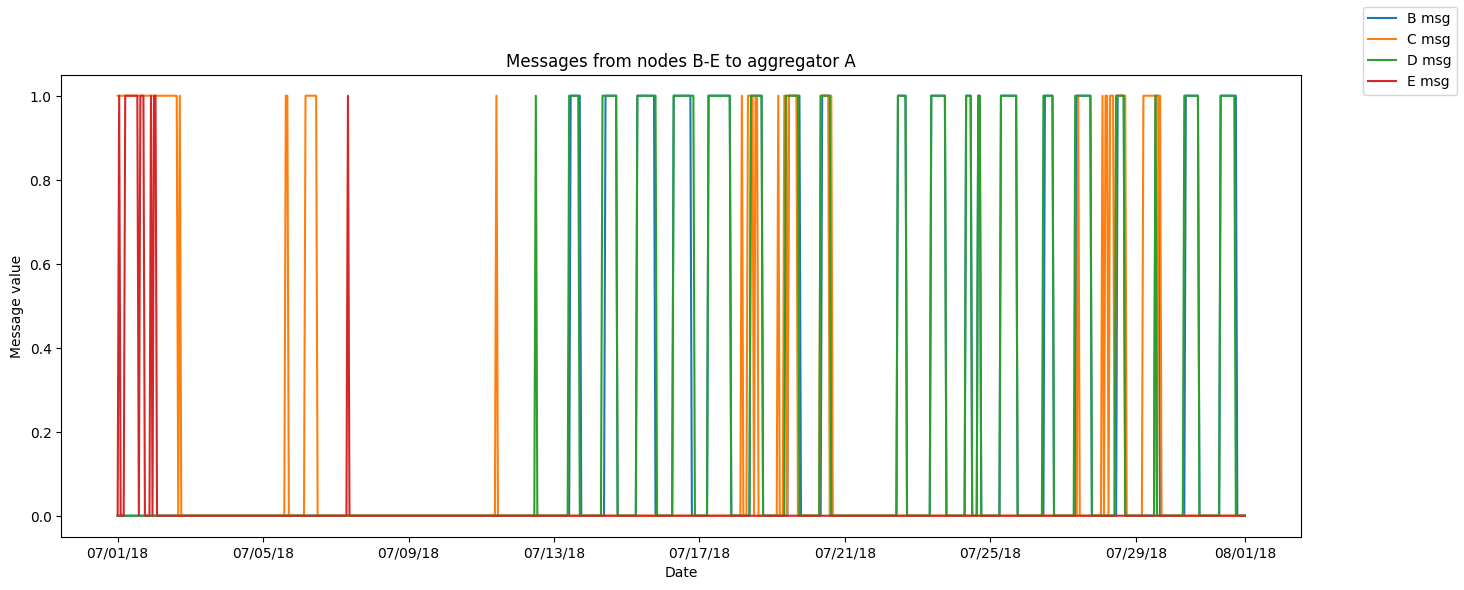

In [53]:
#all msgs to aggregator A
fig, ax = plt.subplots(figsize=(16,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.plot(airport.index,airport['B msg'])
plt.plot(airport.index,airport['C msg'])
plt.plot(Lepola.index,Lepola['D msg'])
plt.plot(Lepola.index,Lepola['E msg'])
ax.set(title='Messages from nodes B-E to aggregator A',xlabel='Date',ylabel='Message value')
fig.legend(['B msg', 'C msg', 'D msg', 'E msg'])

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**

If in airport or Lepola the conditions are met (T>25, wind>5 m/s), then warning is sent.

In [60]:
#warning
airport["Weather Warning"]=(airport['Air temperature (degC)']>25) & (airport['Wind speed (m/s)']>5) | (
    Lepola['Air temperature (degC)']>25) & (Lepola['Wind speed (m/s)']>5)

[Text(0.5, 1.0, 'Weather Warning in Lappeenranta'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Warning state')]

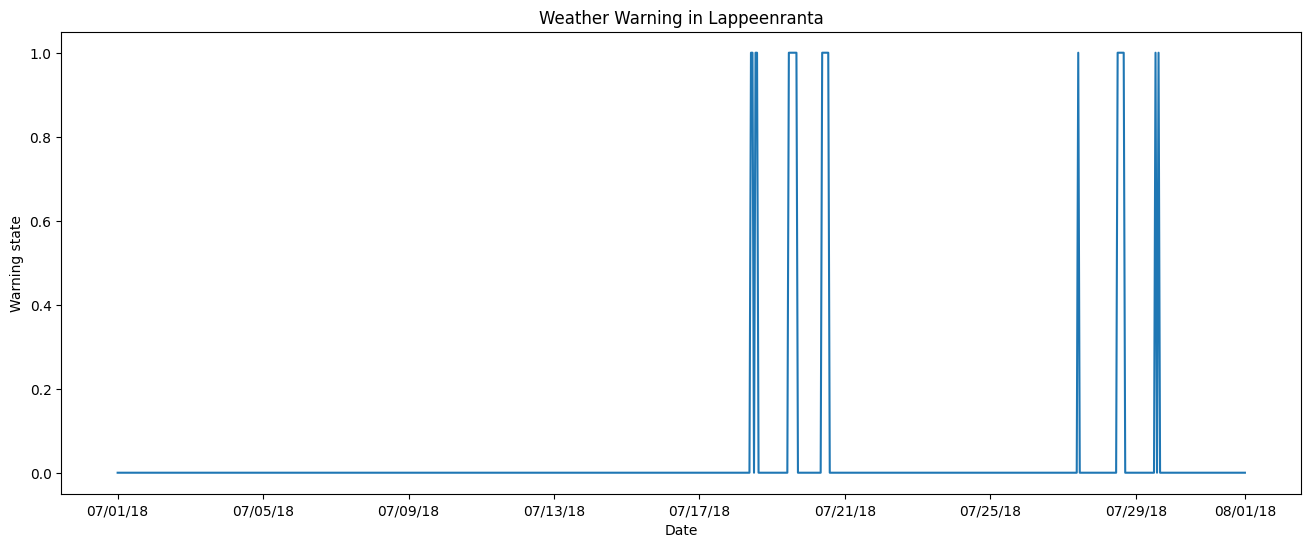

In [61]:
fig, ax = plt.subplots(figsize=(16,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.plot(airport.index,airport['Weather Warning'])
ax.set(title='Weather Warning in Lappeenranta',xlabel='Date',ylabel='Warning state')

The relations can be described with the following functions of boolean algebra:

$A=BC+DE,$

where B-E are states of node messages (0 or 1, i.e. False or True).